# 10 - Diferenčne metode za začetne probleme PDE
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, avgust 2024 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---

## Uvod

Enorazsežna nestacionarna Schrödingerjeva enačba
\begin{equation*}
  \left(i\hbar\frac{\partial}{dt}-H\right)\psi(x,t)=0
\end{equation*}
je osnovno orodje za nerelativistični opis časovnega razvoja kvantnih stanj v različnih potencialih. Tu obravnavamo samo od časa neodvisne hamiltonske operatorje
\begin{equation*}
  H=-\frac{\hbar^2}{2m}\frac{\partial^2}{dx^2}+V(x)\>.
\end{equation*}
Z menjavo spremenljivk $H/\hbar\mapsto H$, $x\sqrt{m/\hbar}\mapsto x$ in $V(x\sqrt{m/\hbar})/\hbar\mapsto V(x)$, efektivno postavimo $\hbar=m=1$,
\begin{equation}
  H=-\frac12\frac{\partial^2}{\partial x^2}+V(x)\>.
\end{equation}


Razvoj stanja $\psi(x,t)$ v stanje $\psi(x,t+\Delta t)$ opišemo s približkom
\begin{equation}
  \psi(x,t+\Delta t)=e^{-i H \Delta t} \psi(x,t)\approx \frac{1- \frac{1}{2} i H \Delta t}{1+ \frac{1}{2} i H \Delta t}\psi(x,t)\>,
\end{equation}
ki je unitaren in je reda $\mathcal{O}(\Delta t^3)$. Območje $a\leq x\leq b$ diskretiziramo na krajevno mrežo $x_j=a+j\Delta x$ pri $0\leq j<N$, $\Delta x = (b-a)/(N-1)$, časovni razvoj pa spremljamo ob časih $t_n=n\Delta t$. Vrednosti valovne funkcije in potenciala v mrežnih točkah ob času $t_n$ označimo $\psi(x_j,t_n)=\psi_j^n$ oziroma $V(x_j)=V_j$. Krajevni odvod izrazimo z diferenco
\begin{equation*}
  \Psi''(x)\approx \frac{\psi(x+\Delta x,t)-2\psi(x,t)+\psi(x-\Delta x,t)}{\Delta x^2}=\frac{\psi_{j+1}^n - 2\psi_j^n+\psi_{j-1}^n}{\Delta x^2}\>.
\end{equation*}
Ko te približke vstavimo v enačbo razvoja in razpišemo Hamiltonov operator po enačbi Hamiltonjana, dobimo sistem enačb
\begin{equation*}
  \psi_j^{n+1}-i\frac{\Delta t}{4\Delta x^2}\left[\psi_{j+1}^{n+1}-2\psi_j^{n+1}+\psi_{j-1}^{n+1}\right] + i\frac{\Delta t}{2}V_j \psi_j^{n+1}=  \psi_j^{n}+i\frac{\Delta t}{4\Delta x^2}\left[\psi_{j+1}^{n}-2\psi_j^{n}+\psi_{j-1}^{n}\right] - i\frac{\Delta t}{2}V_j \psi_j^{n}\>,
\end{equation*}
v notranjih točkah mreže, medtem ko na robu ($j\leq 0$ in $j\geq N$) postavimo $\psi_j^n=0$. Vrednosti valovne funkcije v točkah $x_j$ uredimo v vektor
\begin{equation*}
\boldsymbol{\Psi}^n=(\psi_1^n,\ldots,\psi_{N-1}^n)^T
\end{equation*}
in sistem prepišemo v matrično obliko
\begin{equation*}
  \mathsf{A}\boldsymbol{\Psi}^{n+1}=\mathsf{A}^\ast \boldsymbol{\Psi}^n,\qquad
  \mathsf{A}=\begin{pmatrix}
  d_1 & a \\
  a   & d_2 & a \\
  & a & d_3 & a \\
  & & \ddots & \ddots & \ddots \\
  & & & a & d_{N-2} & a \\
  & & & & a & d_{N-1}
  \end{pmatrix}\>,
\end{equation*}
kjer je

\begin{equation*}
  b= i \frac{\Delta t}{2 \Delta x^2},\qquad a=-\frac{b}{2},\qquad d_j = 1+b+ i \frac{\Delta t}{2}V_j\>.
\end{equation*}

Dobili smo torej matrični sistem, ki ga moramo rešiti v vsakem časovnem koraku, da iz stanja $\boldsymbol{\Psi}^n$ dobimo stanje $\boldsymbol{\Psi}^{n+1}$. Matrika $\mathsf{A}$ in vektor $\boldsymbol{\Psi}$ imata kompleksne elemente, zato račun najlažje opraviš v kompleksni aritmetiki `from cmath import *` za kompleksne funkcije v Pythonu (sama kompleksna aritmetika pa je vgrajena). Izkaže se, da so za zadovoljivo natančnost višji redi nujni (glej dodatni del naloge).


In [237]:
# Standardized imports for MFPR
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import markdown
import datetime
import scipy.special as sp
import scipy.stats as stats
import scipy.optimize as opt
import scipy.interpolate as interp
from matplotlib import animation
import logging
import timeit
import time
# Function and constants defitition for Juptyer notebook (rerun for hot reload of imports)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams["grid.linestyle"]="dashed"
plt.rcParams["figure.edgecolor"] = "black"
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def log_msg(msg, log_filename='my_log_file.log'):
    # Configure the logging module if not already configured
    if not logging.root.handlers:
        logging.basicConfig(
            filename=log_filename,
            level=logging.DEBUG,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

    # Create a logger for the function (you can replace 'my_function' with your desired logger name)
    logger = logging.getLogger('EIGENSTATES')

    # Log the provided message
    logger.info(msg)
def clear_log_file(log_filename='my_log_file.log'):
    with open(log_filename, 'w'):
        pass

def centerHTML(html, text=""):
    text = markdown.markdown(text)
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

def insertHTMLVideo(filename, text=""):
    return centerHTML(f'<video controls src="{filename}" style="max-width: 600px;width:100%"></video>', text)

def insertHTMLAudio(filename, text=""):
    return centerHTML(f'<audio controls src="{filename}" style="max-width: 600px;width:100%"></audio>', text)


clear_log_file()
log_msg('START logging...')


## Naloga

Spremljaj časovni razvoj začetnega stanja
\begin{equation*}
  \Psi(x,0)=\sqrt{\frac{\alpha}{\sqrt{\pi}}} e^{-\alpha^2 (x-\lambda)^2/2}
\end{equation*}
v harmonskem potencialu $V(x)=\frac12 kx^2$, kjer je v naravnih enotah $\alpha=k^{1/4}$, $\omega=\sqrt{k}$. Analitična rešitev je koherentno stanje
\begin{equation*}
  \psi(x,t)=\sqrt{\frac{\alpha}{\sqrt{\pi}}} \exp\left[-\frac12 \left(\xi-\xi_\lambda \cos\omega t\right)^2 - i \left(\frac{\omega t}{2}+\xi\xi_\lambda \sin\omega t - \frac14 \xi_\lambda^2 \sin 2 \omega t\right)\right]\>,
\end{equation*}
kjer je $\xi=\alpha x$, $\xi_\lambda=\alpha \lambda$. Postavi parametre na $\omega=0.2$, $\lambda=10$. Krajevno mrežo vpni v interval $[a,b]=[-40,40]$ z $N=300$ aktivnimi točkami. Nihajni čas je $T=2\pi/\omega$ -- primerno prilagodi časovni korak $\Delta t$ in stanje opazuj deset period.

Opazuj še razvoj gaussovskega valovnega paketa
\begin{equation*}
  \psi(x,0)=(2\pi \sigma_0^2)^{-1/4} e^{i k_0(x-\lambda)}e^{-(x-\lambda)^2/(2\sigma_0)^2}
\end{equation*}
v prostoru brez potenciala. Postavi $\sigma_0=1/20$, $k_0=50\pi$, $\lambda=0.25$ in območje $[a,b]=[-0.5,1.5]$ ter $\Delta t=2\Delta x^2$. Časovni razvoj spremljaj, dokler težišče paketa ne pride do $x\approx 0.75$. Analitična rešitev je
\begin{equation*}
  \psi(x,t)=\frac{(2\pi \sigma_0^2)^{-1/4}}{\sqrt{1+i t/(2\sigma_0^2)}} \exp\left[
    \frac{-(x-\lambda)^2/(2\sigma_0)^2+i k_0(x-\lambda)-i k_0^2 t/2}{1+i t/(2\sigma_0^2)}
    \right]
\end{equation*}


**Dodatek:** Z uporabljenim približkom za drugi odvod reda $\mathcal{O}(\Delta x^2)$ dobimo tridiagonalno matriko. Z diferencami višjih redov dobimio večdiagonalno (pasovno) matriko, a dosežemo tudi večjo krajevno natančnost. Diference višjih redov lahko hitro izračunaš na primer v Mathematici.

## Razvoj koherentnega stanja

Sistem rešimo numerično za N = 300 x 300. Pri tem je $\Delta t = T_0 / 300$. Opazimo, da se valovna funkcija giblje kot delec v harmonskem potencialu. Na animaciji opazimo, da se amplituda valovanja spreminja, kar je posledica numeričnih napak.

In [238]:
from cmath import *

def initial_state(x, alpha, lambda_):
    return np.sqrt(alpha / np.sqrt(np.pi)) * np.exp(-alpha**2 * (x - lambda_)**2 / 2)

def coherent_state(x, t, alpha, omega, lambda_):
    xi = alpha * x
    xi_lambda = alpha * lambda_
    
    phase = -0.5 * (xi - xi_lambda * np.cos(omega * t))**2
    oscillation = -1j * (0.5 * omega * t + xi * xi_lambda * np.sin(omega * t) - 0.25 * xi_lambda**2 * np.sin(2 * omega * t))
    
    return np.sqrt(alpha / np.sqrt(np.pi)) * np.exp(phase + oscillation)

def V(x, omega):
    return 0.5 * omega**2 * x**2



# Parameters
omega = 0.2
lambda_ = 10
a, b = -40, 40
N = 300
alpha = np.sqrt(omega)  # Assuming k=1, so omega = sqrt(k) and alpha = k^(1/4)
x = np.linspace(a, b, N)
T = 2 * np.pi / omega # Period of the harmonic oscillator

# time settings
timesteps = 300
t = np.linspace(0, T, timesteps)

dt = t[1] - t[0]
dx = (b - a) / (N - 1)
sled = np.zeros((timesteps, N))

for i, t_i in enumerate(t):
    psi_t = coherent_state(x, t_i, alpha, omega, lambda_)
    sled[i] = np.abs(psi_t)


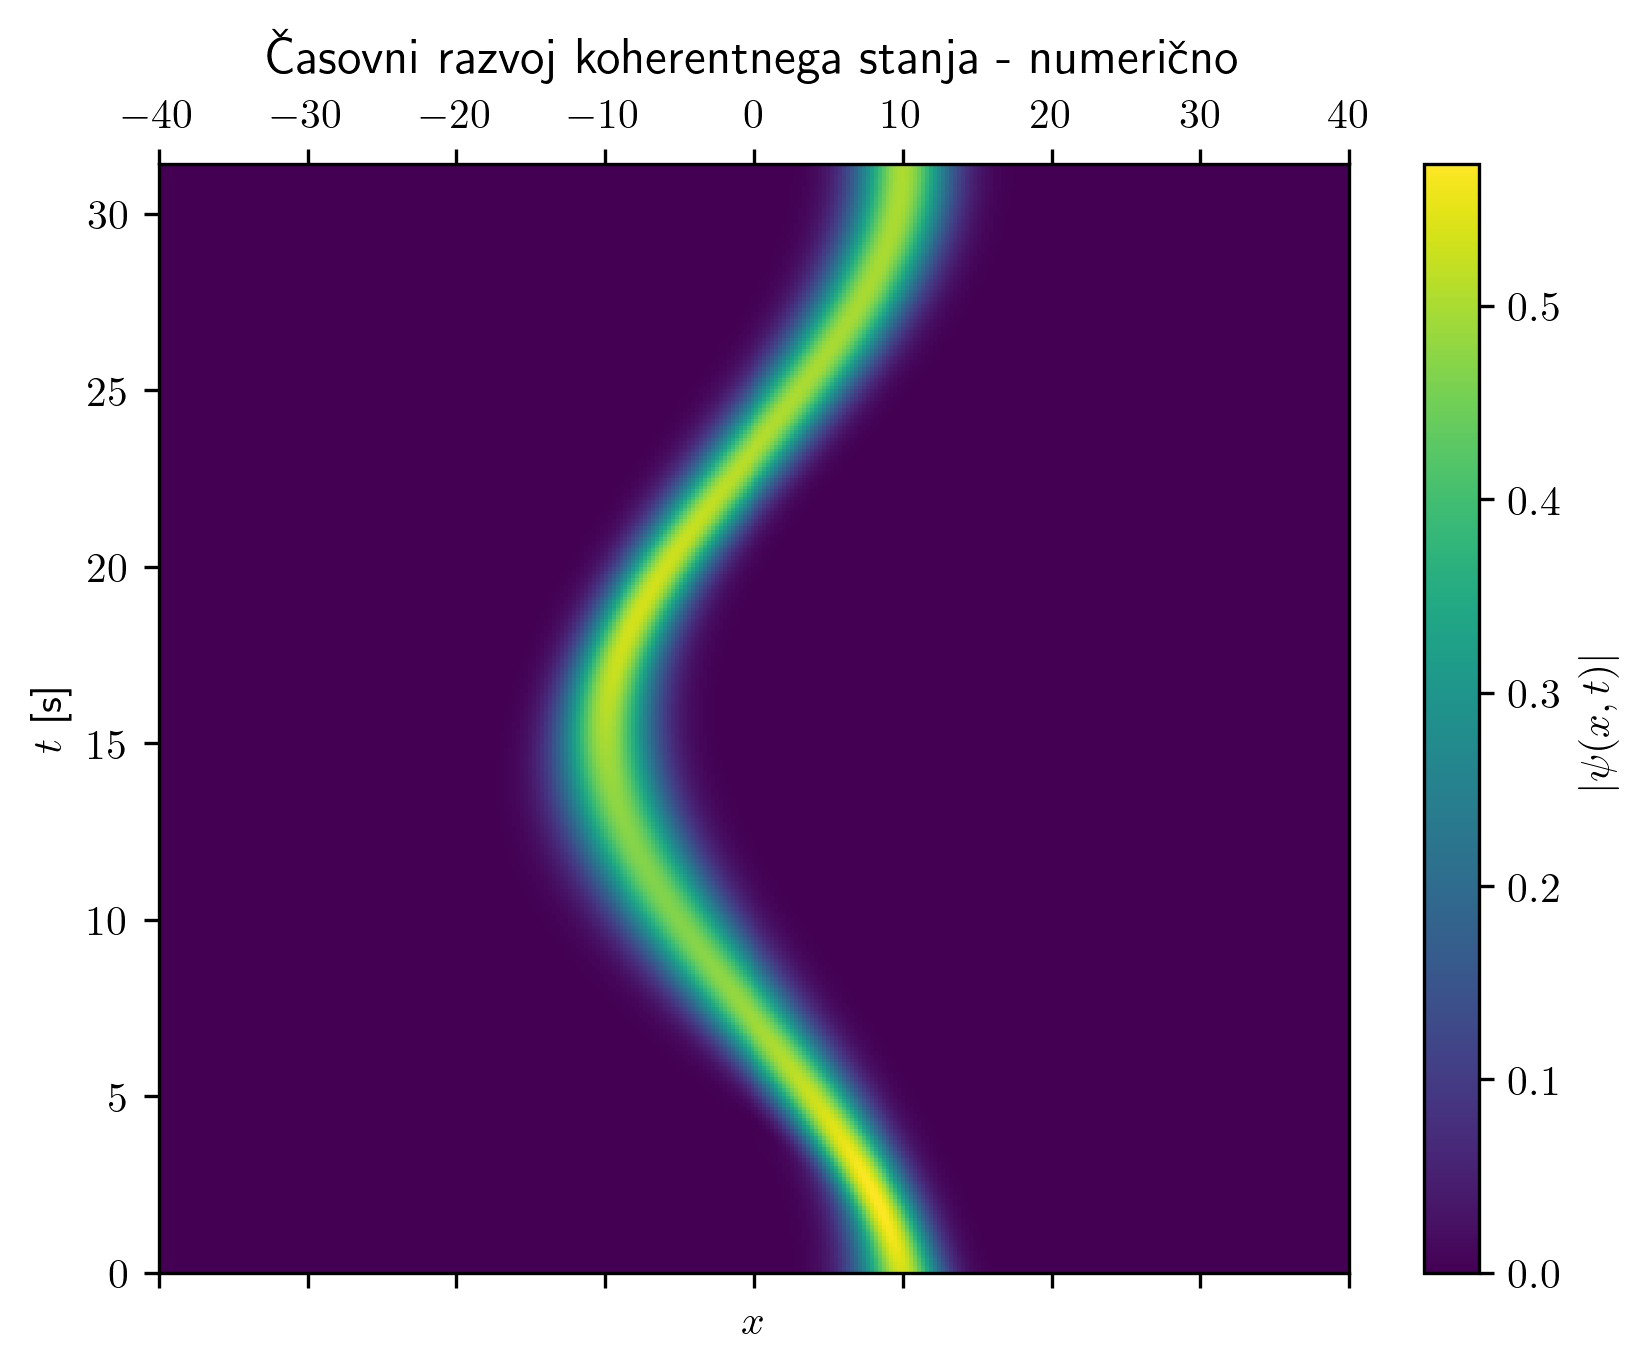

In [239]:
def generate_A(n, dx, dt, V):
    b = 1j * dt / (2 * dx**2)
    a = -b / 2
    diag1 = np.eye(n, k=1) * a
    diag2 = np.eye(n, k=-1) * a    
    diag3 = np.diag(1 + b + 1j * dt / 2 * V, k=0)
    A = diag1 + diag2 + diag3
    return np.array(A)

x_0 = initial_state(x, alpha, lambda_)[1:-1]
x_small = x[1:-1]

Vs = V(x, omega)[1:-1]
n = len(x_0)
A = generate_A(n, dx, dt, Vs)

psi_n = x_0
sled2 = np.zeros((timesteps, N))

for i, t_i in enumerate(t):
    psi_n = np.linalg.inv(A) @ np.conjugate(A) @ psi_n
    sled2[i] = np.abs(np.concatenate(([0], psi_n, [0])))

fig, ax = plt.subplots()
cax = ax.matshow(sled2, aspect='auto', extent=[a, b, 0, T])
cb = fig.colorbar(cax)
cb.set_label('$|\psi(x, t)|$')
ax.set_xlabel('$x$')
ax.set_ylabel('$t$ [s]')
plt.title('Časovni razvoj koherentnega stanja - numerično')
plt.show()

In [240]:
plt.ioff()
my_file = './media/coherent_state.mp4'
if True:
    # create an animation of the time evolution of the wave function
    fig, ax = plt.subplots()
    line, = ax.plot(x, sled2[0])
    ax.set_xlim(a, b)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$|\psi(x, t)|$')
    plt.title('Časovni razvoj koherentnega stanja - numerično')

    def animate(i):
        line.set_ydata(sled2[i])
        ax.relim()
        ax.autoscale_view()
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=timesteps, interval=50, blit=True)
    ani.save(my_file, writer='ffmpeg', fps=60, dpi=300)
    plt.close()

In [241]:
display(HTML(insertHTMLVideo(my_file, f'**Časovni razvoj koherentnega stanja** - animirano')))

V primerjavi z analitično rešitvijo vidimo, da se napake sistematsko večajo z naraščanjem $t$.

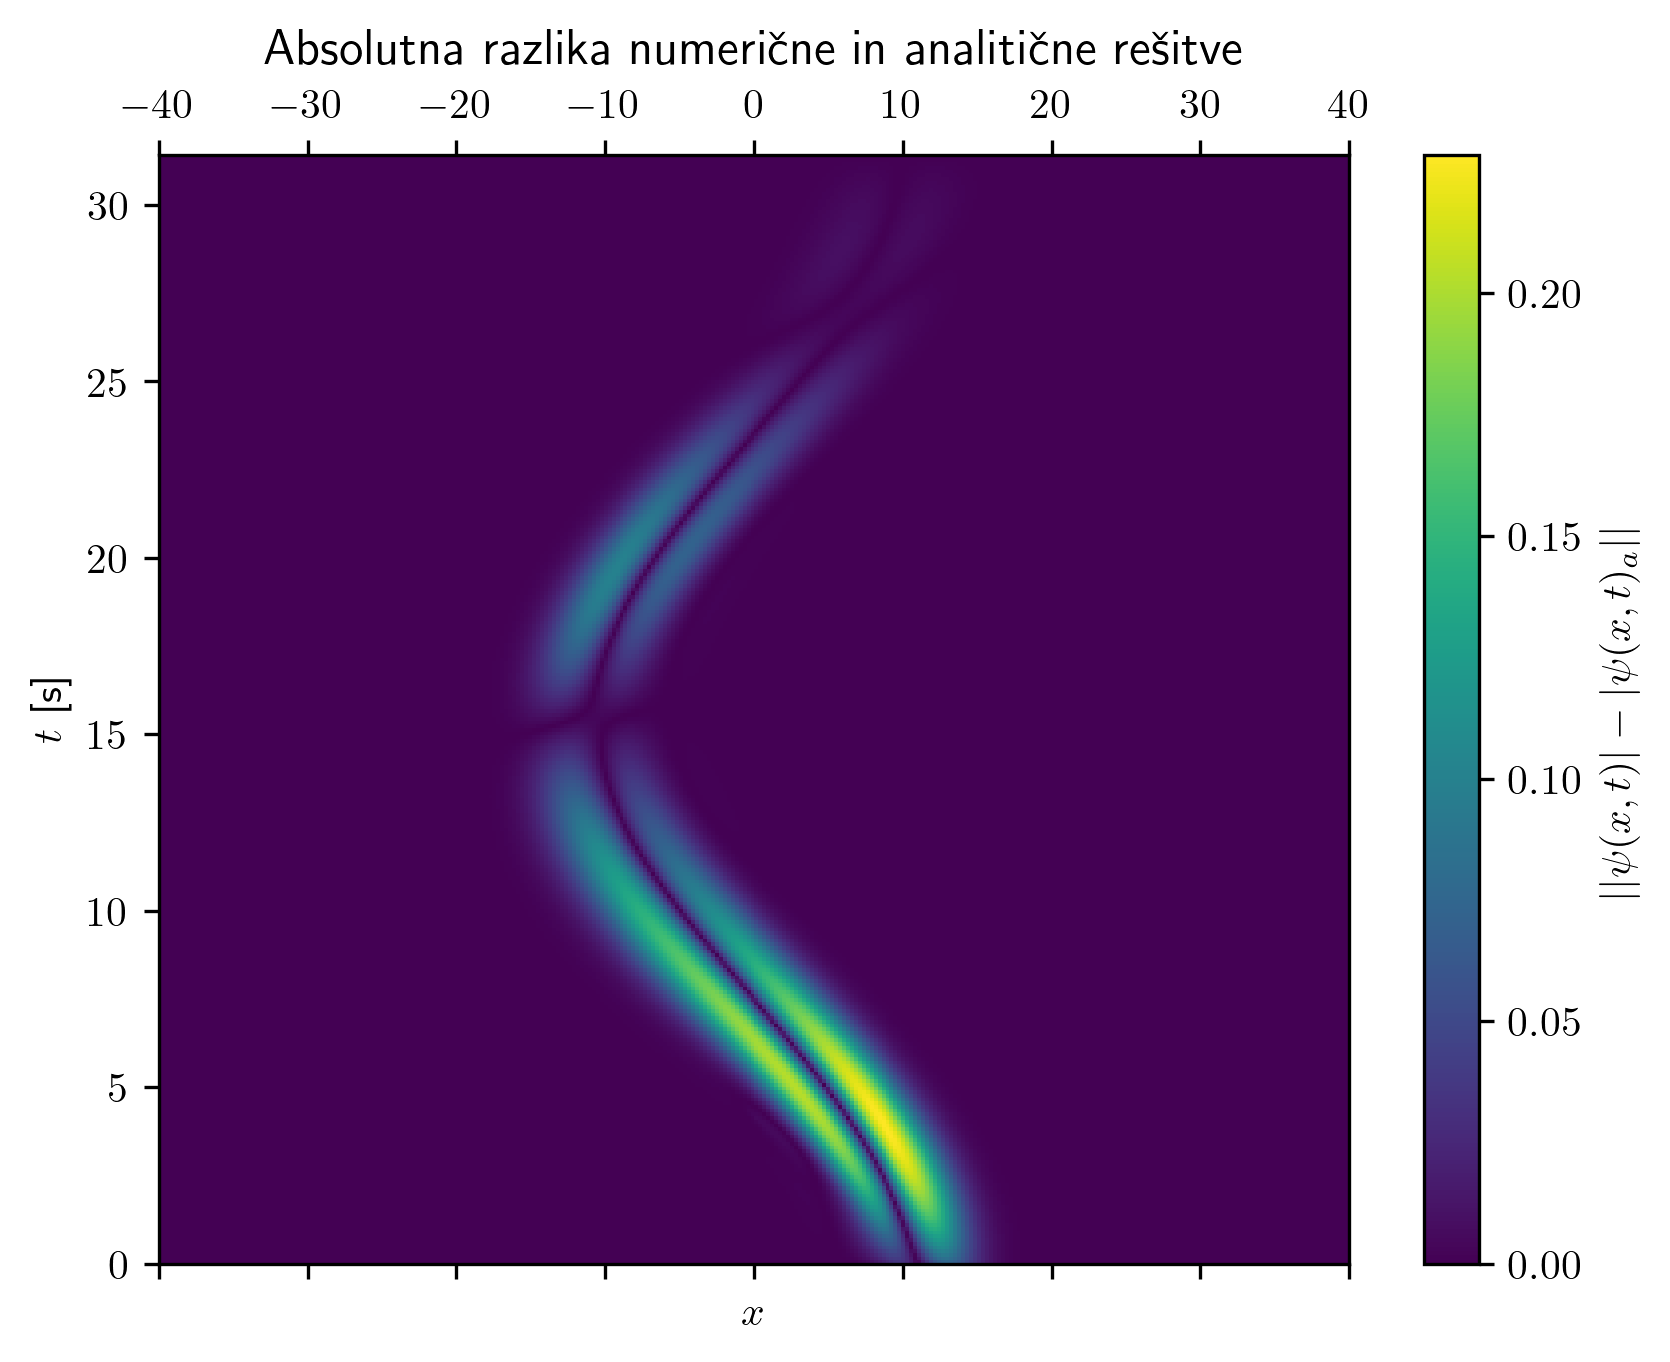

In [242]:
fig, ax = plt.subplots()
cax = ax.matshow(np.abs(sled2 - sled), aspect='auto', extent=[a, b, 0, T])
cb = fig.colorbar(cax)
cb.set_label('$| |\psi(x, t)| - |\psi(x, t)_a| |$')
ax.set_xlabel('$x$')
ax.set_ylabel('$t$ [s]')
plt.title('Absolutna razlika numerične in analitične rešitve')
plt.show()

### Analiza metode

Analiziramo še časovno zahtevnost in si po bližje poglejmo napake. V nadaljevanju smo iterirali gostoto mreže N x N za $\Delta t = N$.

In [243]:
# save numpy array to parquet

# Parameters
omega = 0.2
lambda_ = 10
a, b = -40, 40

data = {
}

for N in range(100, 501, 100):
    alpha = np.sqrt(omega)  # Assuming k=1, so omega = sqrt(k) and alpha = k^(1/4)
    x = np.linspace(a, b, N)
    T = 2 * np.pi / omega # Period of the harmonic oscillator
    timesteps = N
    t = np.linspace(0, T, timesteps)
    dt = t[1] - t[0]
    dx = (b - a) / (N - 1)

    sled = np.zeros((timesteps, N))

    for i, t_i in enumerate(t):
        psi_t = coherent_state(x, t_i, alpha, omega, lambda_)
        sled[i] = np.abs(psi_t)

    x_0 = initial_state(x, alpha, lambda_)[1:-1]
    x_small = x[1:-1]

    Vs = V(x, omega)[1:-1]
    n = len(x_0)
    A = generate_A(n, dx, dt, Vs)

    psi_n = x_0
    sled2 = np.zeros((timesteps, N))

    # measure time for the loop
    start = time.time()
    for i, t_i in enumerate(t):
        psi_n = np.linalg.inv(A) @ np.conjugate(A) @ psi_n
        sled2[i] = np.abs(np.concatenate(([0], psi_n, [0])))**2
    end = time.time()

    data[N] = {
        'time': end - start,
        'analityc': sled,
        'numeric': sled2
    }

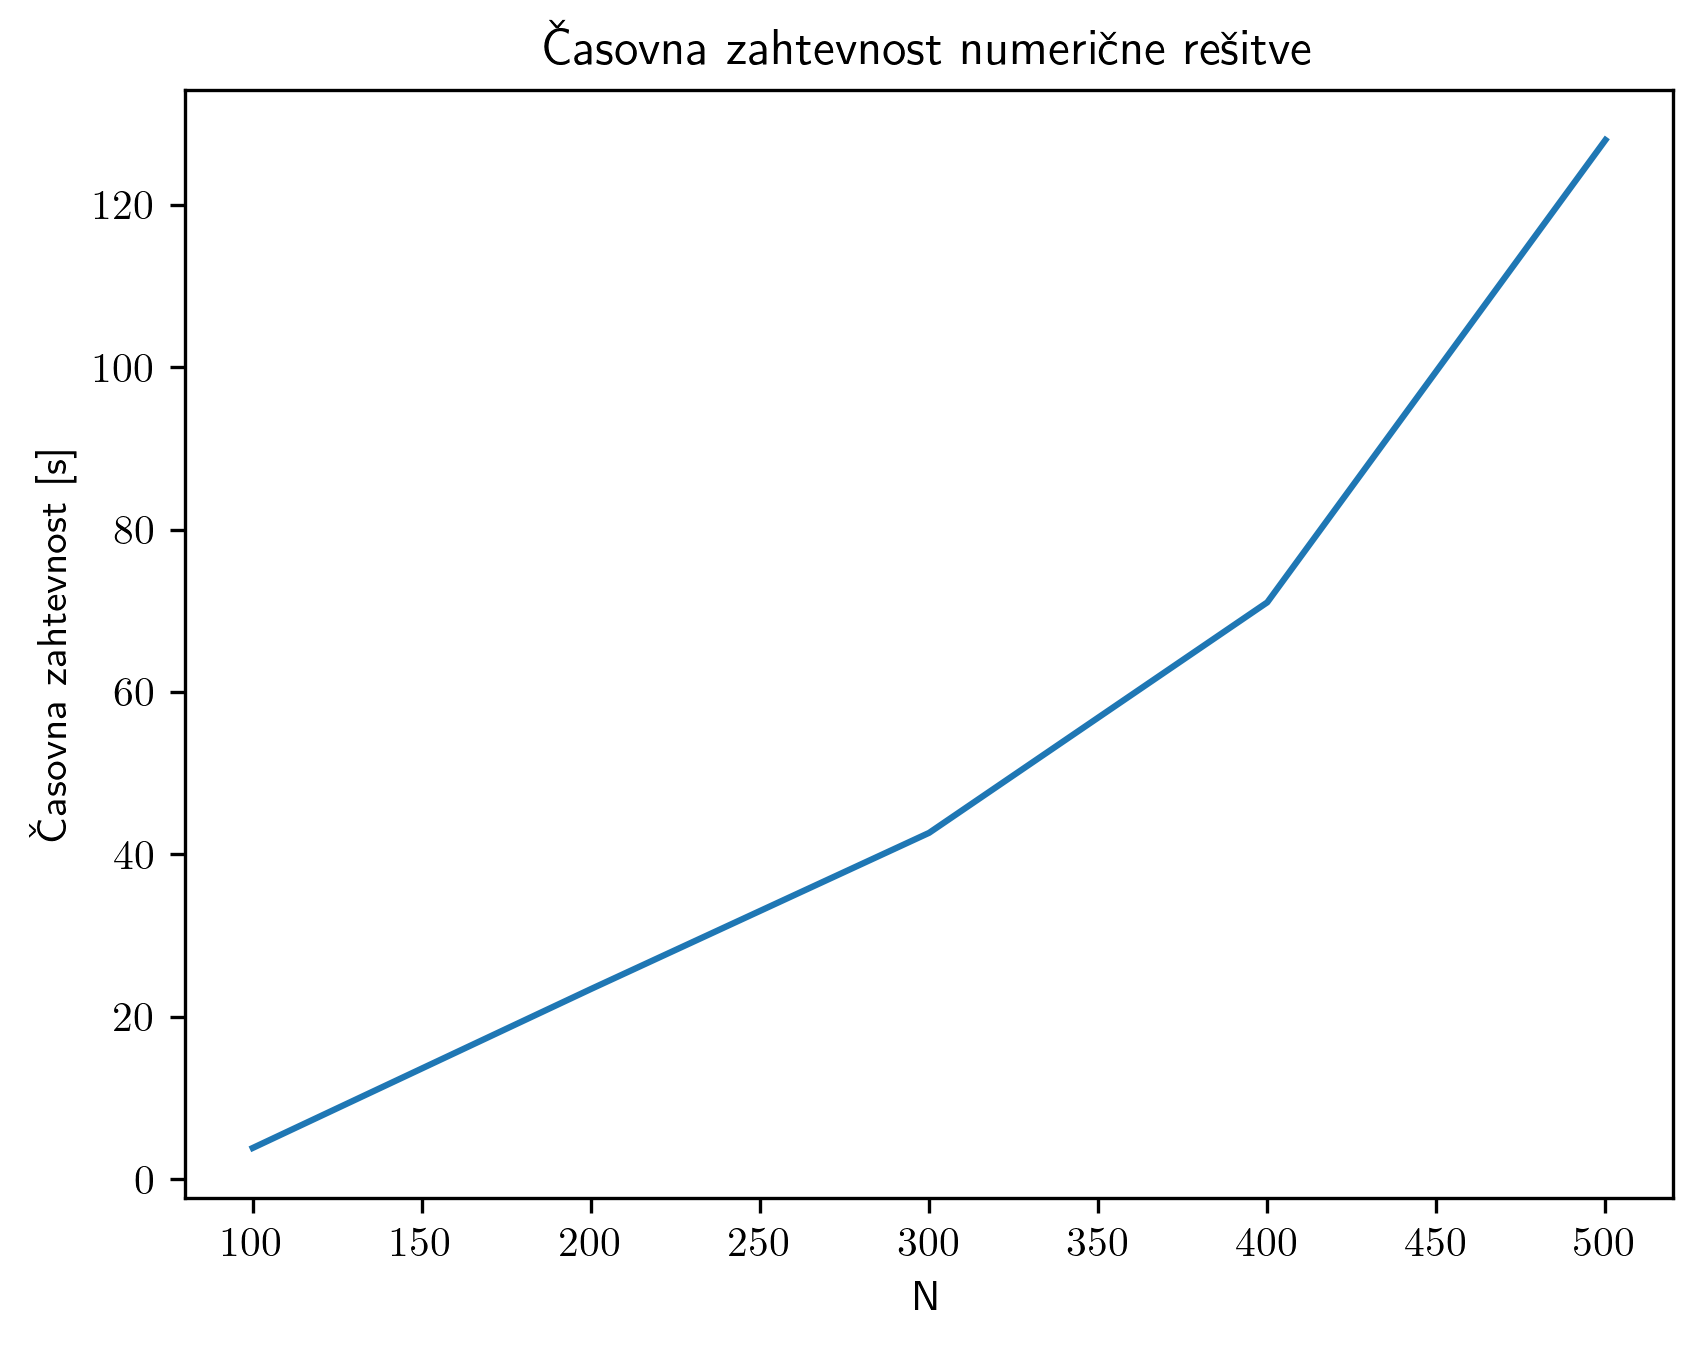

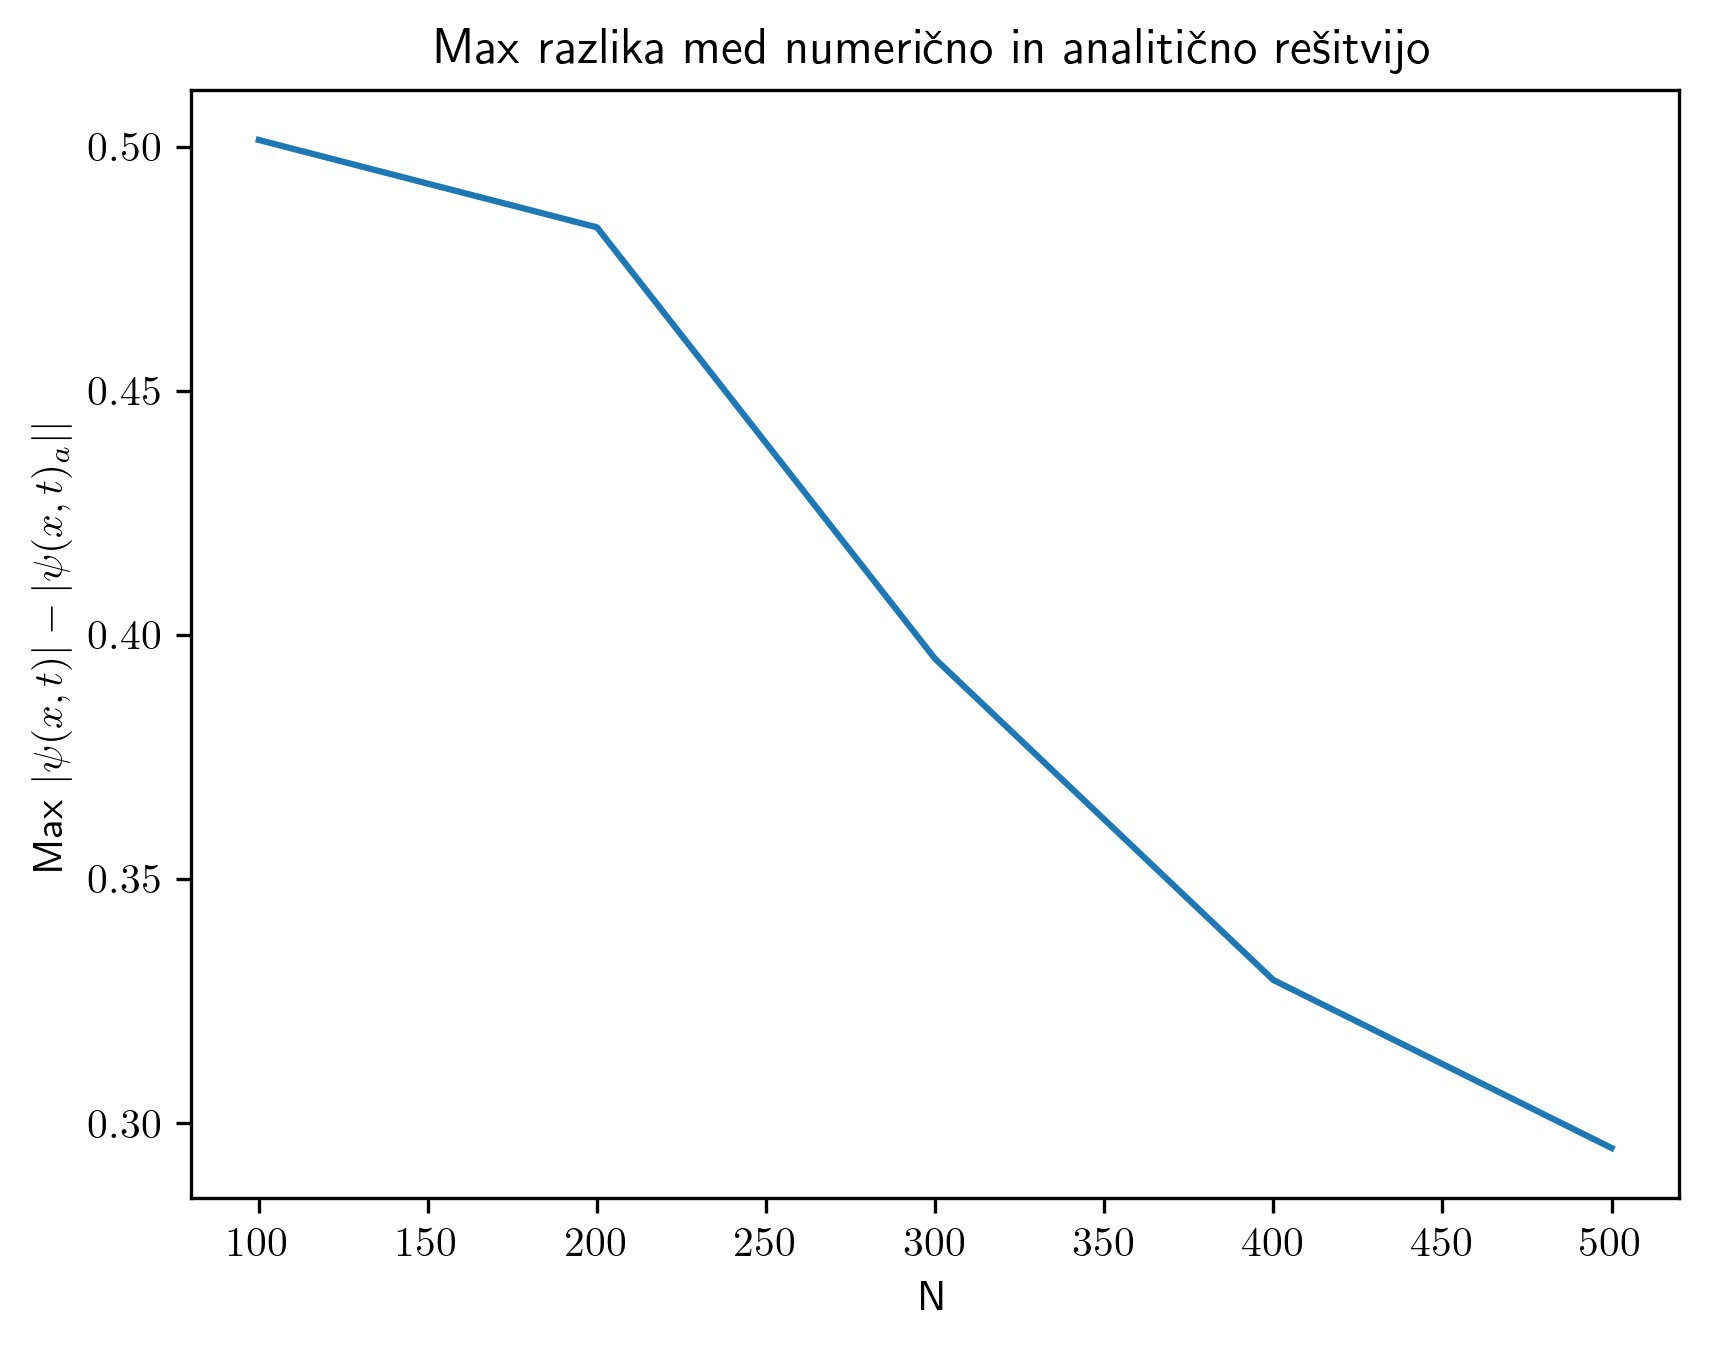

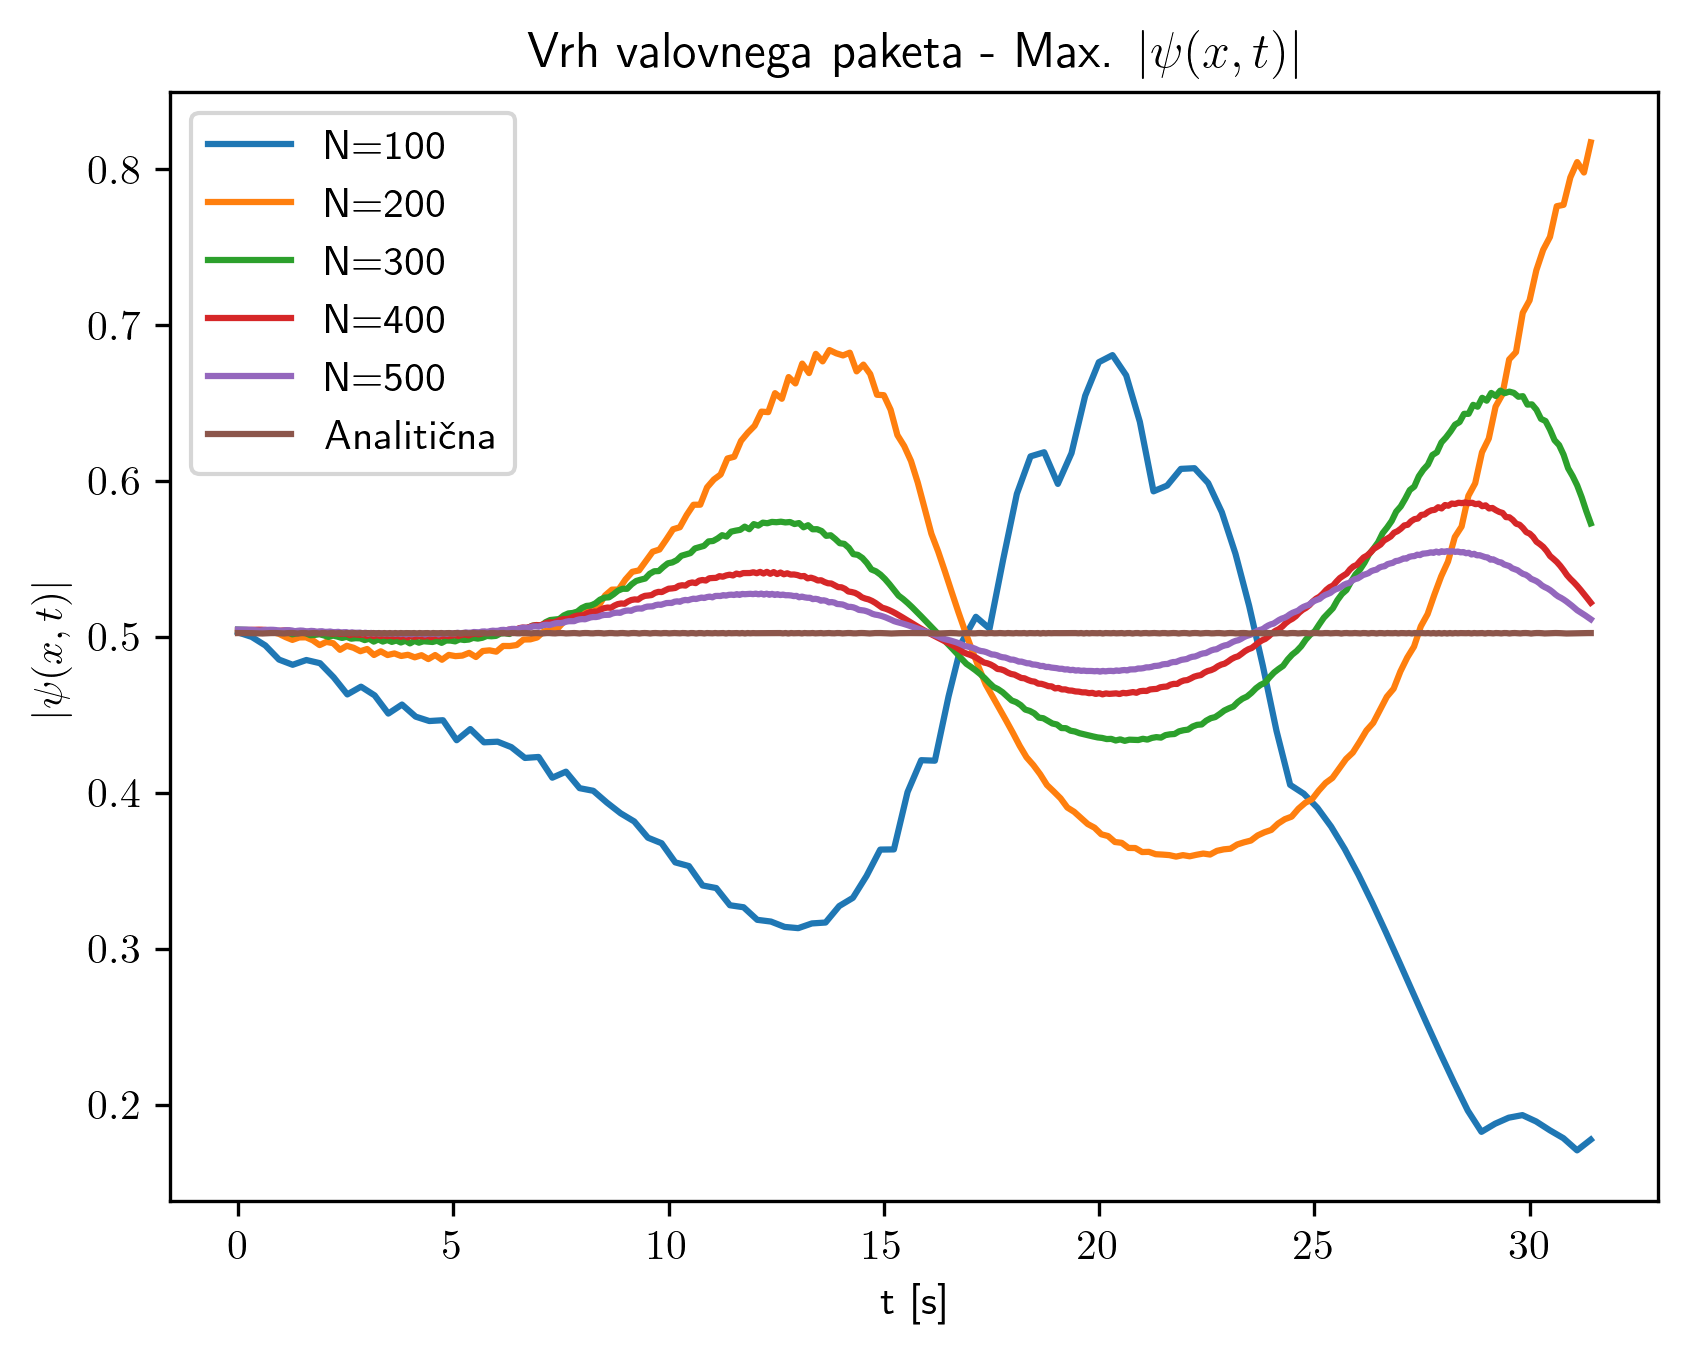

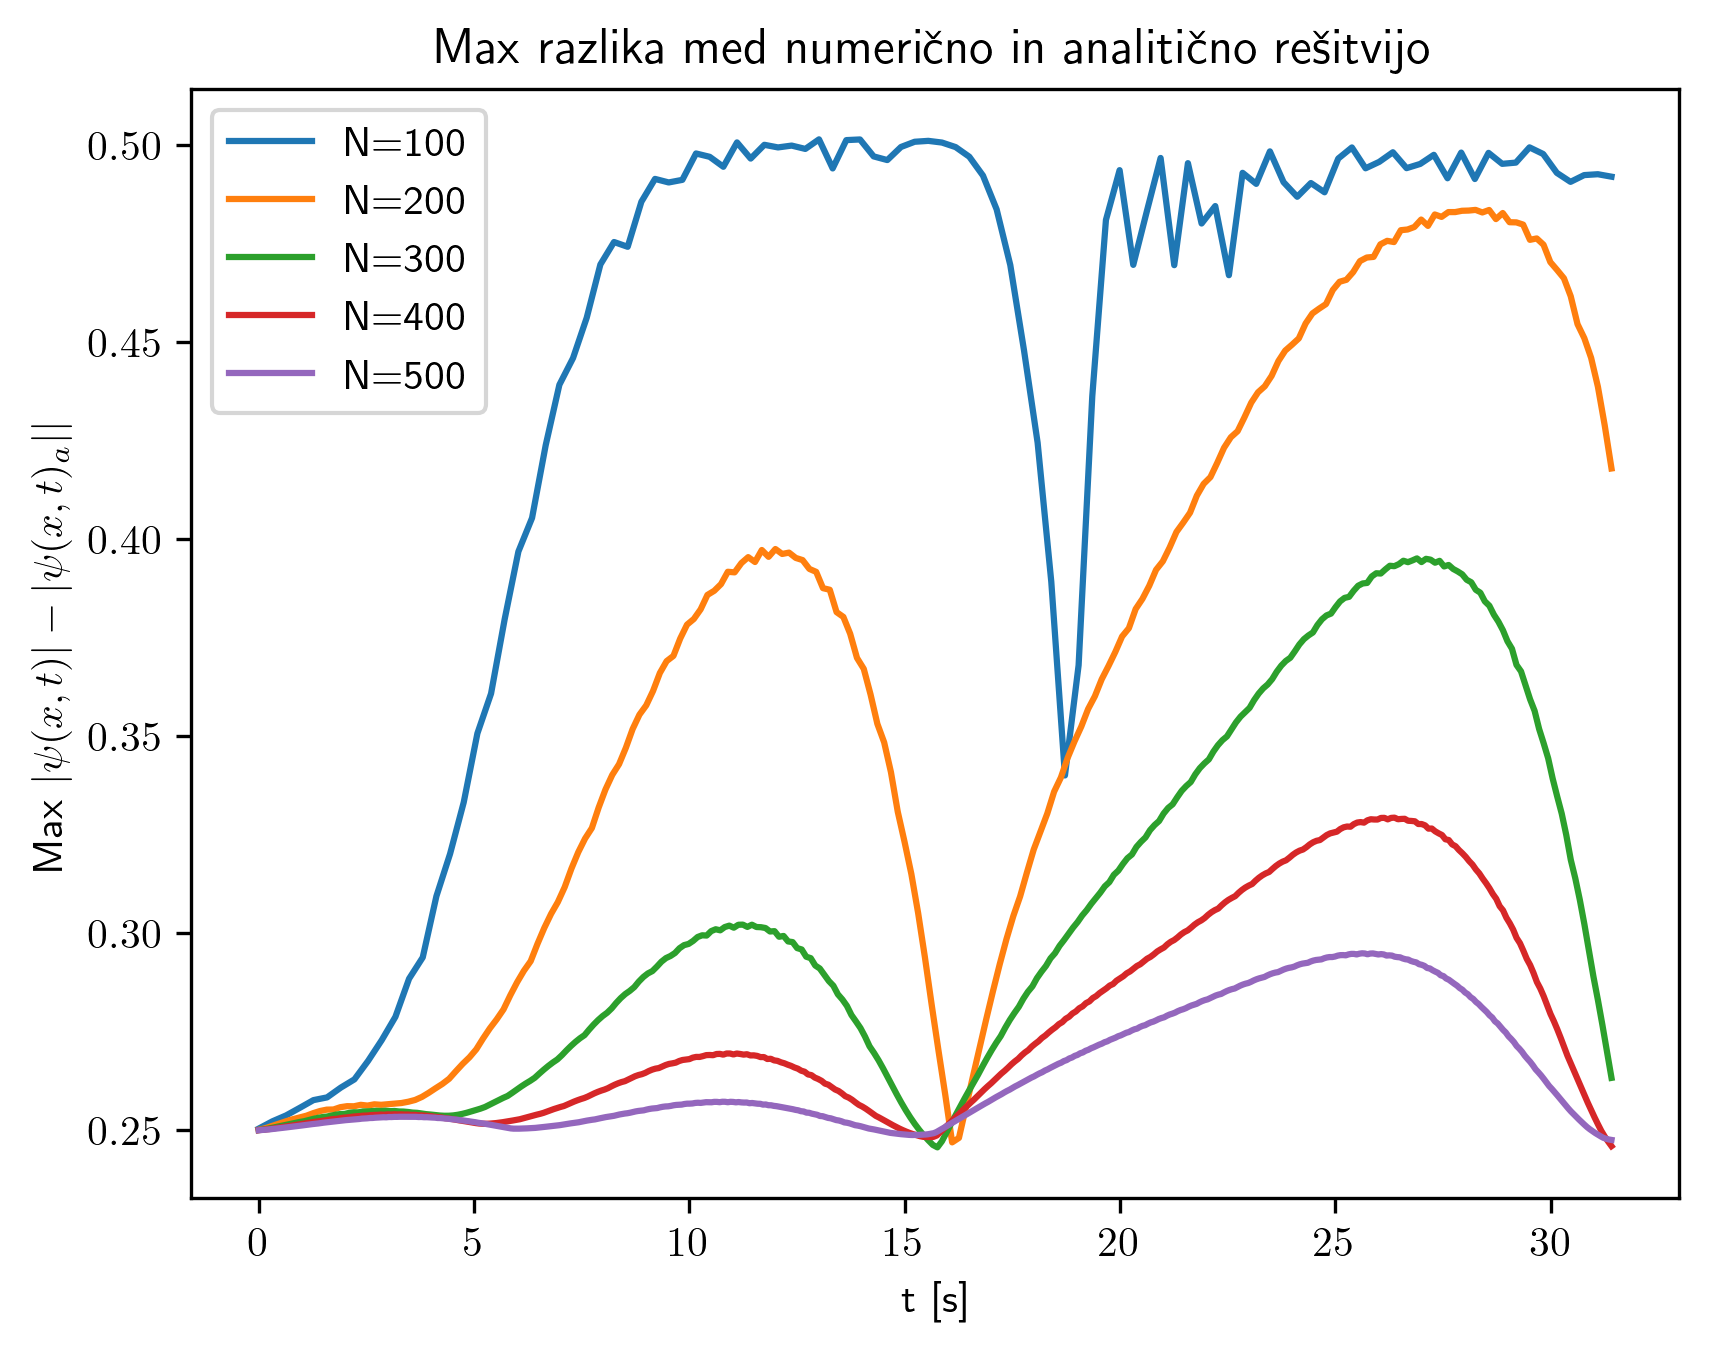

In [251]:
# from data plot time complexity vs N

N = list(data.keys())
N = sorted(N)
computation_time = [data[n]['time'] for n in N]

plt.plot(N, computation_time)
plt.xlabel('N')
plt.ylabel('Časovna zahtevnost [s]')
plt.title('Časovna zahtevnost numerične rešitve')
plt.show()

# plot max difference between numerical and analytical solution in respect to N

max_diff = [np.max(np.abs(data[n]['analityc'] - data[n]['numeric'])) for n in N]

plt.plot(N, max_diff)
plt.xlabel('N')
plt.ylabel('Max $ |\psi(x, t)| - |\psi(x, t)_a| |$')
plt.title('Max razlika med numerično in analitično rešitvijo')
plt.show()

# plot max psi for N = 100, 200, 300, 400, 500, 600, 700, 800, 900 and the max psi of analytical solution

for n in N:
    t = np.linspace(0, T, n)
    plt.plot(t, np.max(data[n]['numeric'], axis=1) * 2, label=f'N={n}')
plt.plot(t, np.max(data[500]['analityc'], axis=1), label='Analitična')
plt.xlabel('t [s]')
plt.ylabel('$|\psi(x, t)|$')
plt.legend()
plt.title('Vrh valovnega paketa - Max. $|\psi(x, t)|$')
plt.show()

# plot max difference between numerical and analytical solution in respect to t for N = 100, 200, 300, 400, 500, 600, 700, 800, 900

for n in N:
    t = np.linspace(0, T, n)
    plt.plot(t, np.max(np.abs(data[n]['analityc'] - data[n]['numeric']), axis=1), label=f'N={n}')
plt.xlabel('t [s]')
plt.ylabel('Max $ |\psi(x, t)| - |\psi(x, t)_a| |$')
plt.legend()
plt.title('Max razlika med numerično in analitično rešitvijo')
plt.show()

Opazimo, da se napake sistematsko večajo, pri čemer bolj gosta mreža producira manjšo napako. Vendar z večanjem $N$ tudi časovna zahtevnost bistveno narašča, kar kliče po izboljšavi metode kot take.  

## Gaussov valovni paket

V drugem delu si poglejmo še Gaussov valovni paket izven potenciala. Na animaciji opazimo pričakovano premikanje in "širjenje" valovnega paketa. Vendar nas v nadaljevanju preseneti velikost napake v primerjavi z analitično rešitvijo. Le-ta je skoraj reda velikosti amplitude valovnega paketa. Kar nam močno sugerira, da bi za nadaljno analizo potrebovali metode višjega reda.

In [245]:
def initial_state(x, sigma_0, k0, lambda_):
    return (2 * np.pi * sigma_0**2)**(-0.25) * np.exp(1j * k0 * (x - lambda_)) * np.exp(-((x - lambda_)**2) / (4 * sigma_0**2))

def gaussian_wave_packet(x, t, sigma_0, k0, lambda_):
    sigma_t =  np.sqrt(1 + 1j * t / (2 * sigma_0**2))
    phase = 1j * k0**2 * t / 2
    gaussian_envelope = -(x - lambda_)**2 / (4 * sigma_0**2)
    return (2 * np.pi * sigma_0**2)**(-0.25) / sigma_t * np.exp(
        (gaussian_envelope + 1j * k0 * (x - lambda_) - phase) / (1 + 1j * t / (2 * sigma_0**2))
    )

# Parameters
sigma_0 = 1 / 20  # Width of the wave packet
k0 = 50 * np.pi   # Initial wave number
lambda_ = 0.25    # Initial position
a, b = -0.5, 1.5  # Spatial domain
N = 1000           # Number of spatial points
x = np.linspace(a, b, N)

# Time settings
dx = (b - a) / (N - 1)
dt = 2 * dx**2
t = np.arange(0, 500) * dt

# Calculate the time evolution
sled = np.zeros((len(t), N))
for i, t_i in enumerate(t):
    psi_t = gaussian_wave_packet(x, t_i, sigma_0, k0, lambda_)
    sled[i] = np.abs(psi_t)

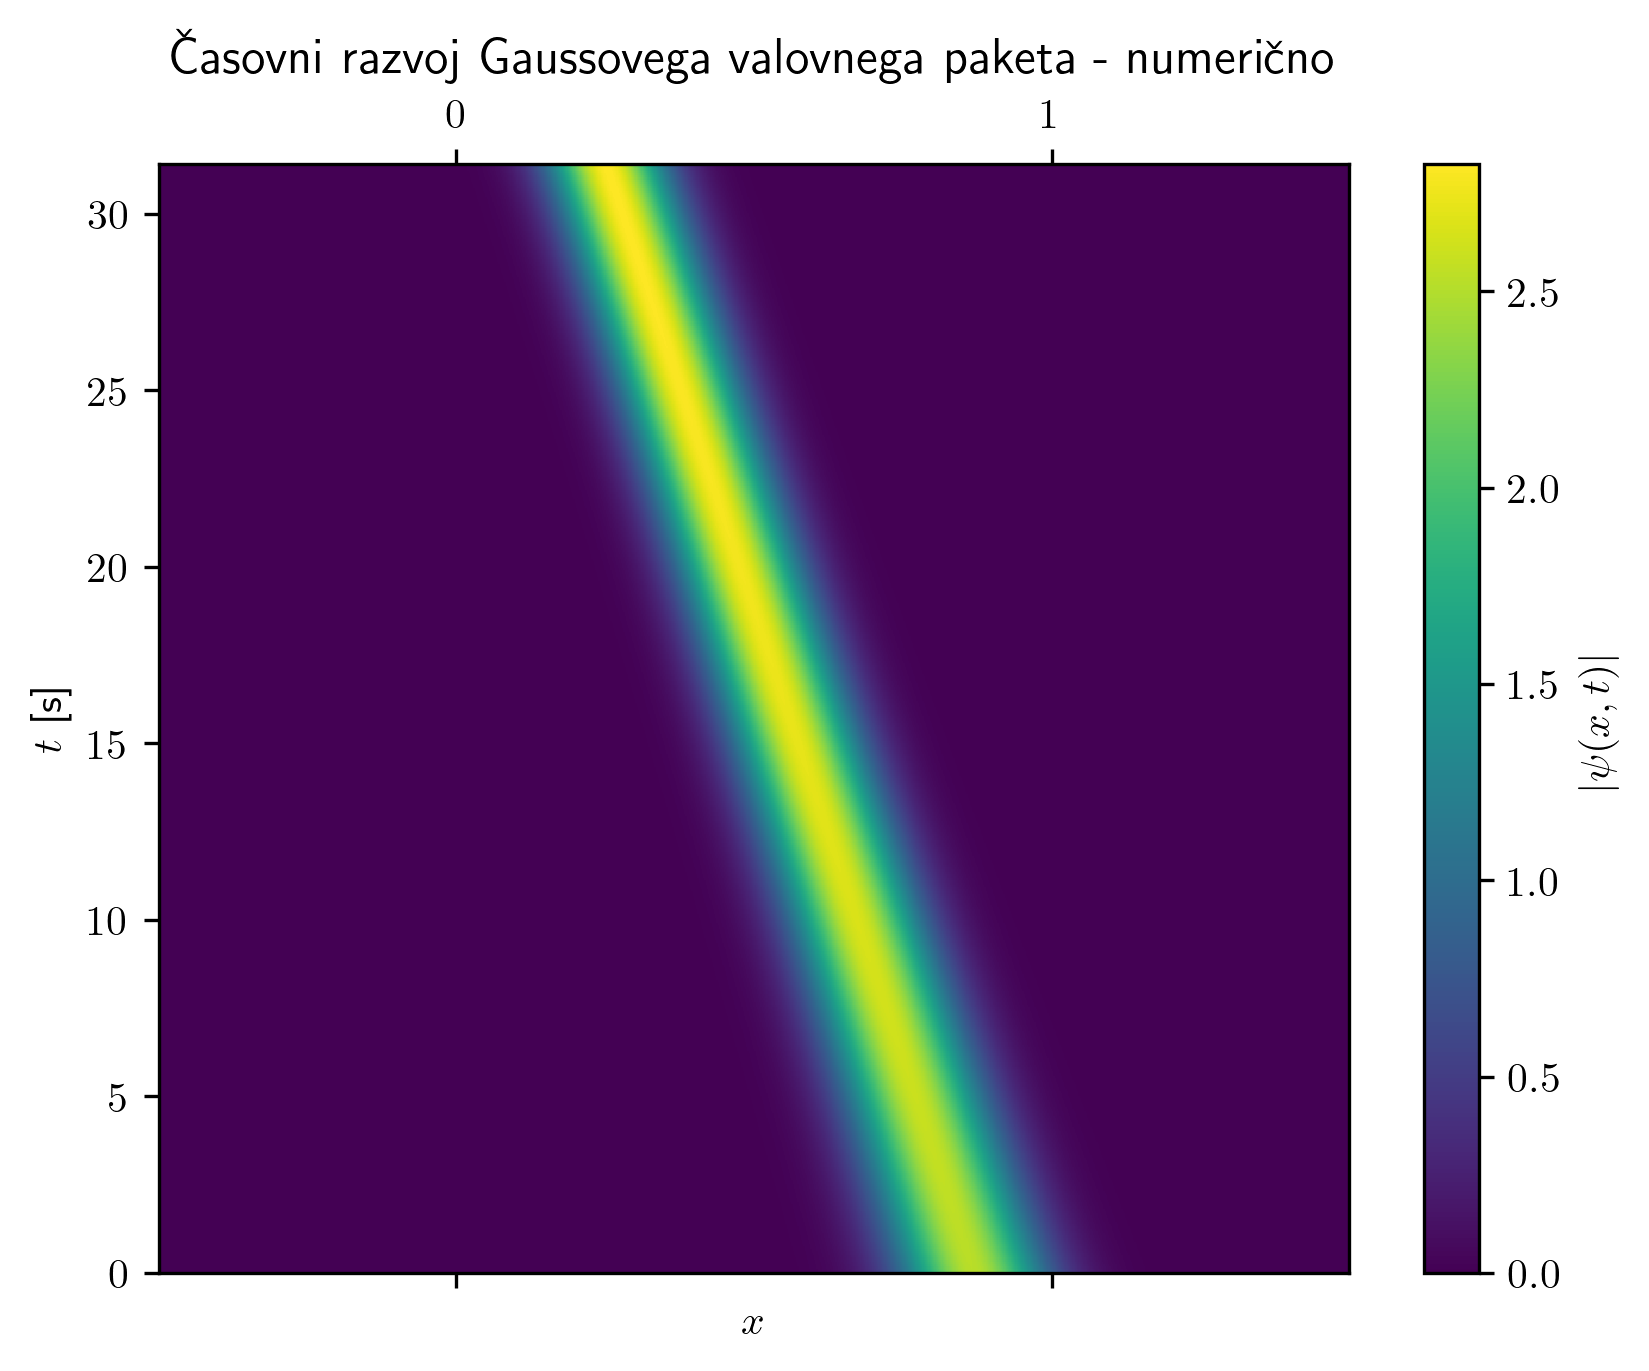

In [246]:
def generate_A(n, dx, dt):
    b = 1j * dt / (2 * dx**2)
    a = -b / 2
    diag1 = np.eye(n, k=1) * a
    diag2 = np.eye(n, k=-1) * a    
    diag3 = np.eye(n, k=0) * (1 + b)
    A = diag1 + diag2 + diag3
    return np.array(A)

x_0 = initial_state(x, sigma_0, k0, lambda_)[1:-1]
x_small = x[1:-1]

n = len(x_0)
A = generate_A(n, dx, dt)

psi_n = x_0
sled2 = np.zeros((len(t), N))

for i, t_i in enumerate(t):
    psi_n = np.linalg.inv(A) @ np.conjugate(A) @ psi_n
    sled2[i] = np.abs(np.concatenate(([0], psi_n, [0])))

fig, ax = plt.subplots()
cax = ax.matshow(sled2, aspect='auto', extent=[a, b, 0, T])
cb = fig.colorbar(cax)
cb.set_label('$|\psi(x, t)|$')
ax.set_xlabel('$x$')
ax.set_ylabel('$t$ [s]')
plt.title('Časovni razvoj Gaussovega valovnega paketa - numerično')
plt.show()

In [247]:
plt.ioff()
my_file = './media/gaussian_state.mp4'
if True:
    # create an animation of the time evolution of the wave function
    fig, ax = plt.subplots()
    line, = ax.plot(x, sled2[0])
    ax.set_xlim(a, b)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$|\psi(x, t)|$')
    plt.title('Časovni razvoj Gaussovega valovnega paketa - numerično')

    def animate(i):
        line.set_ydata(sled2[i])
        ax.relim()
        ax.autoscale_view()
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)
    ani.save(my_file, writer='ffmpeg', fps=60, dpi=300)
    plt.close()

In [248]:
display(HTML(insertHTMLVideo(my_file, f'**Časovni razvoj koherentnega stanja** - animirano')))

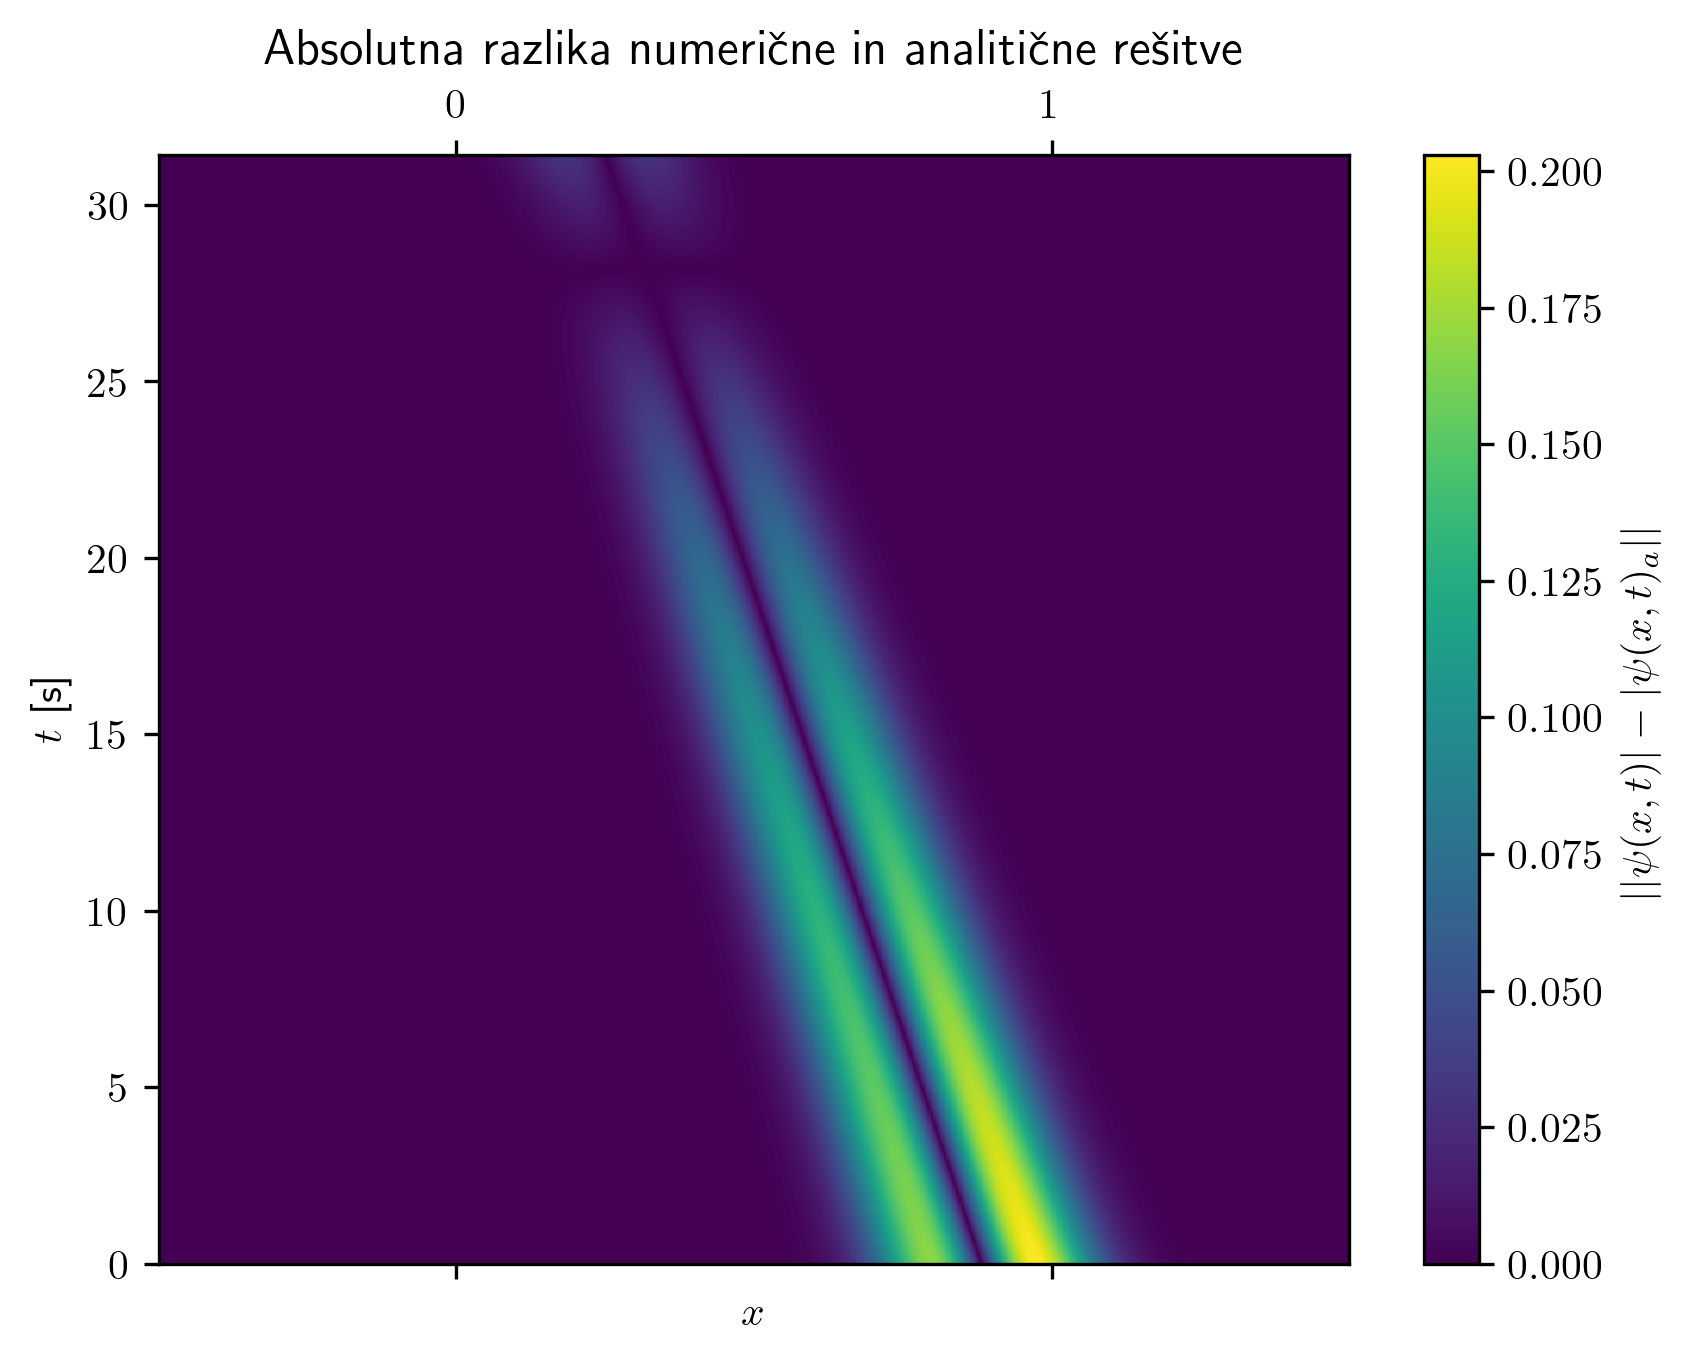

In [249]:
fig, ax = plt.subplots()
cax = ax.matshow(np.abs(sled2 - sled), aspect='auto', extent=[a, b, 0, T])
cb = fig.colorbar(cax)
cb.set_label('$| |\psi(x, t)| - |\psi(x, t)_a| |$')
ax.set_xlabel('$x$')
ax.set_ylabel('$t$ [s]')
plt.title('Absolutna razlika numerične in analitične rešitve')
plt.show()

## Zaključek

V tej nalogi smo z diferencnimi metodami preučili časovni razvoj kvantnih stanj pri enorazsežni Schrödingerjevi enačbi. Simulacije harmonskega potenciala in prostega Gaussovega valovnega paketa so pokazale pričakovano vedenje, vendar tudi veliko kopičenje napak, predvsem pri daljših časovnih intervalih. Iz rezultatov je razvidna očitna potreba po metodah višjega reda, katerih implementacijo pa prepuščam navdušencem z malo več časa. 

---
Luka Skeledžija, [Github source 🔗](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/10_diffm), 2024